Car_Dekho

Bangalore_Cars Unstructured to Structured 

Concate all 6 Structured_City Dataset to a New dataset

Data cleaning and Pre Processing with Scaling and Saving of Preprocessing steps for Future Application Building

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

# Load the dataset
df = pd.read_csv('car_dekho_Structured.csv', low_memory=False)

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Helper function to convert price from various formats to float
def convert_price(price):
    try:
        price = str(price).replace('₹', '').replace(',', '').strip()
        if 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 100000
        else:
            return float(price)
    except ValueError:
        return np.nan

# Apply conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)

# Clean the 'km' column by removing commas and converting to integers
df['km'] = df['km'].str.replace('Kms', '').str.replace(',', '').astype(float)

# Fill missing values for numerical columns
df.fillna({
    'price': df['price'].median(),
    'ownerNo': df['ownerNo'].median(),
    'km': df['km'].median()
}, inplace=True)

# Remove the 'owner' column since it's the same as 'ownerNo'
df.drop(columns=['owner'], inplace=True)

# Clean and extract mileage from 'top_0_value.2' column and rename the column
def clean_mileage(mileage):
    try:
        mileage = str(mileage).replace('kmpl', '').replace('km/kg', '').strip()
        mileage_float = float(mileage)
        if mileage_float < 100:  # Assuming mileage values should be less than 100
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

df['mileage'] = df['top_0_value.2'].apply(clean_mileage)

# Clean and extract seats from 'top_3_value' column and rename the column
def clean_seats(seats):
    try:
        seats = str(seats).replace('Seats', '').strip()
        seats_int = int(seats)
        if seats_int < 10:  # Assuming seat values should be less than 10
            return seats_int
        else:
            return np.nan
    except ValueError:
        return np.nan

df['Seats'] = df['top_3_value'].apply(clean_seats)

# Drop the original columns 'top_0_value.2' and 'top_3_value'
df.drop(['top_0_value.2', 'top_3_value'], axis=1, inplace=True)

# Label Encoding for categorical variables
label_encoders = {}
def label_encode(df, columns):
    global label_encoders
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    return df

categorical_columns = ['ft', 'bt', 'transmission', 'oem', 'model', 'variantName', 'City']
df = label_encode(df, categorical_columns)

# Normalizing numerical features using Min-Max Scaling, excluding 'price'
scalers = {}
def min_max_scaling(df, columns):
    global scalers
    for col in columns:
        if col in df.columns:
            scaler = MinMaxScaler()
            df[col] = scaler.fit_transform(df[[col]])
            scalers[col] = scaler
    return df

df = min_max_scaling(df, ['km', 'modelYear', 'ownerNo', 'mileage', 'Seats'])

# Removing outliers using IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Save the cleaned data
df.to_csv('car_dekho_cleaned_dataset.csv', index=False)

# Save preprocessing steps
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scalers, 'scalers.pkl')

print("Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset.csv'.")
print("Preprocessing steps saved.")


Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset.csv'.
Preprocessing steps saved.


Exploratory Data Analysis: Plots

C:\Users\Palla. Saidulu\AppData\Local\Temp\ipykernel_5708\3746828631.py:7: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scaled = pd.read_csv('car_dekho_cleaned_dataset.csv')


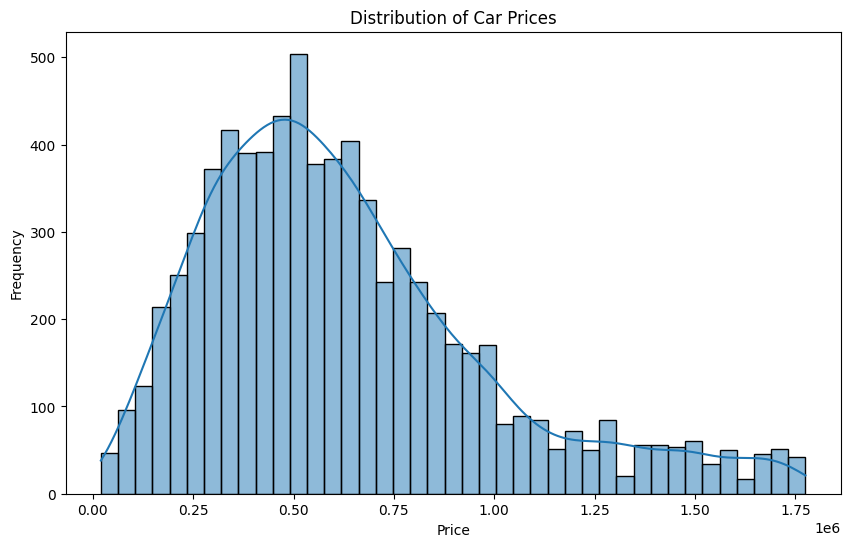

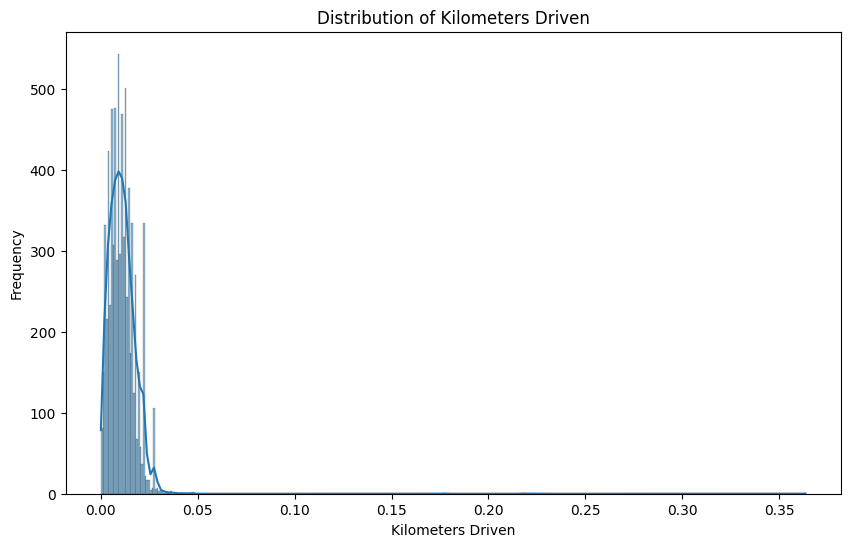

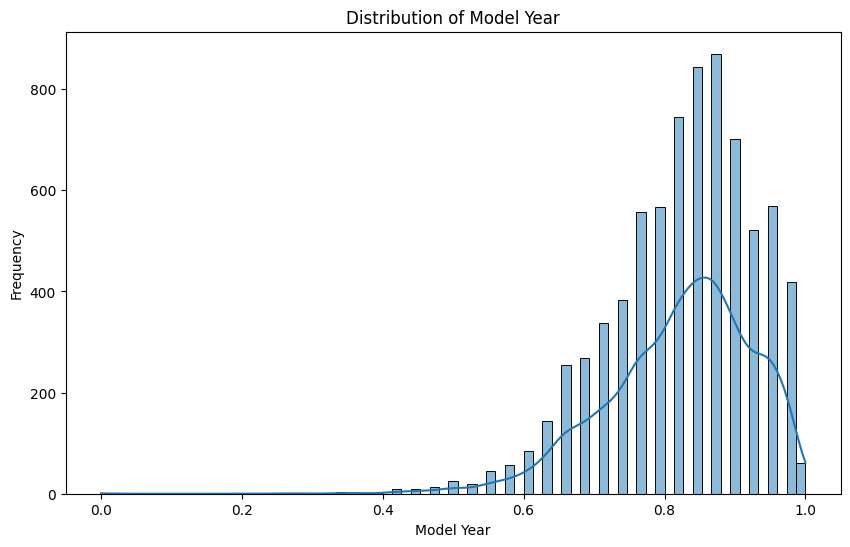

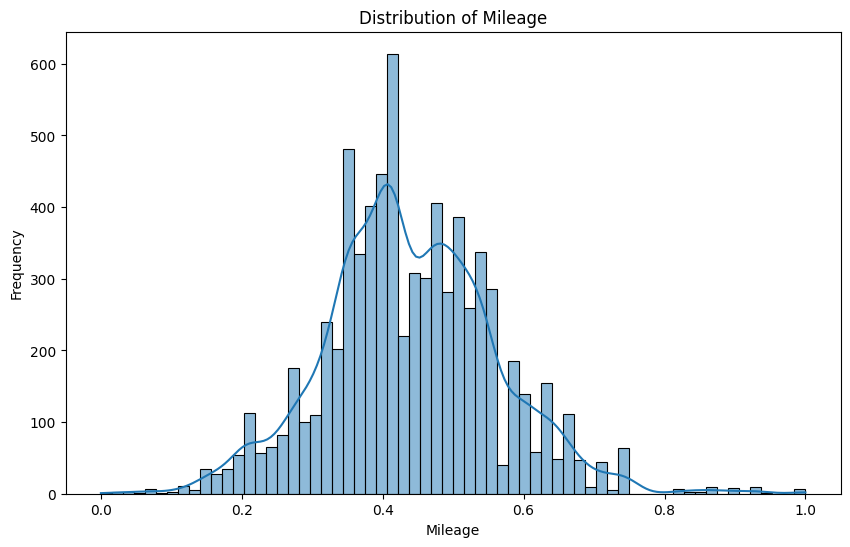

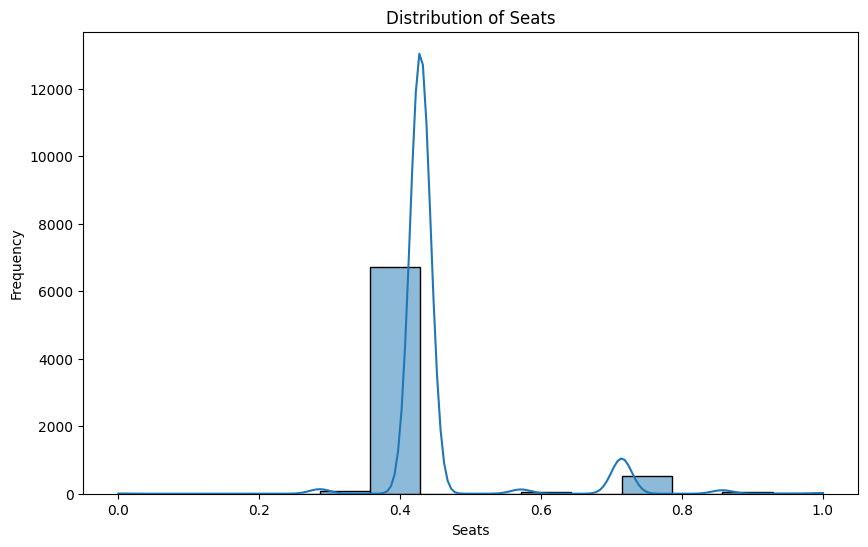

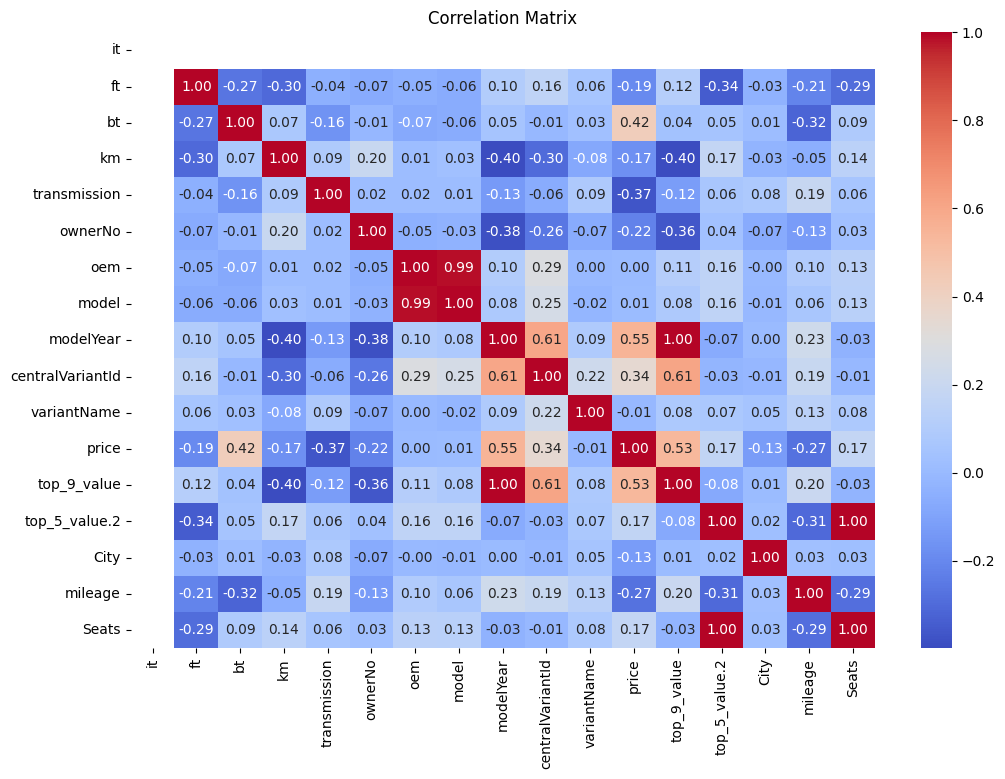

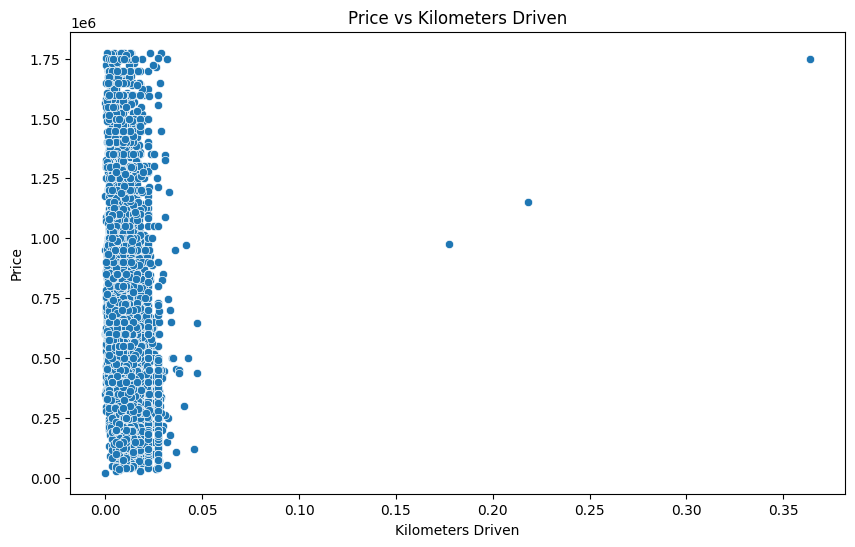

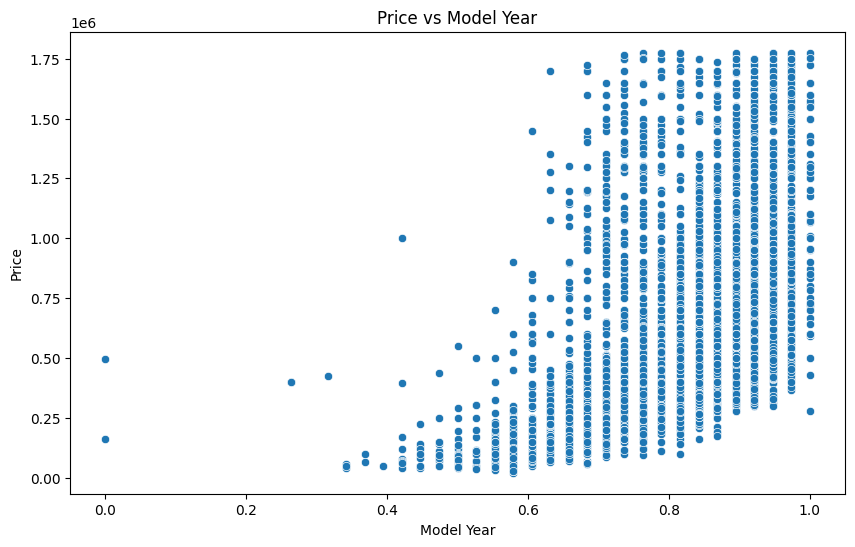

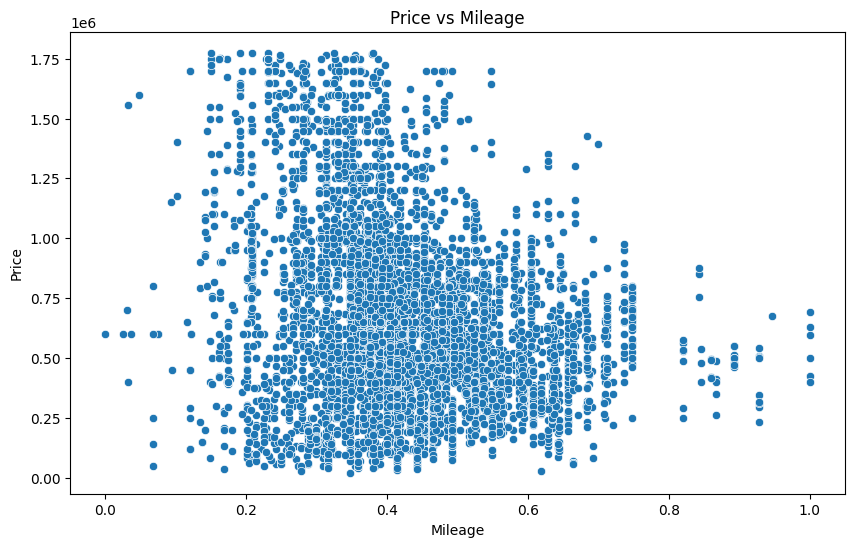

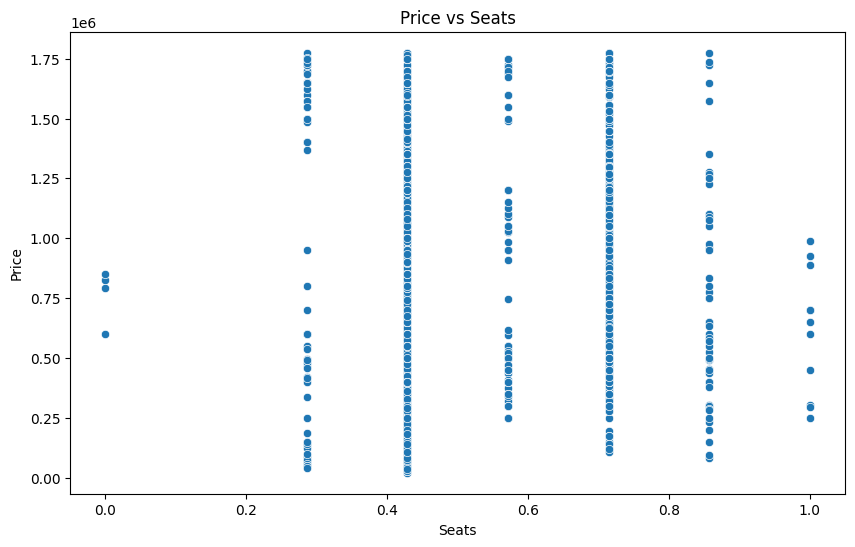

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned dataset with scaling
df_scaled = pd.read_csv('car_dekho_cleaned_dataset.csv')

# Distribution Plot for Price
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Kilometers Driven
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['km'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Model Year
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['modelYear'], kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Mileage
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['mileage'], kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Seats
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['Seats'], kde=True)
plt.title('Distribution of Seats')
plt.xlabel('Seats')
plt.ylabel('Frequency')
plt.show()

# Select only numeric columns
df_numeric = df_scaled.select_dtypes(include=[np.number])

# Correlation Matrix for the scaled data
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot of Price vs Kilometers Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km', y='price', data=df_scaled)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Price vs Model Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='modelYear', y='price', data=df_scaled)
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Price vs Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=df_scaled)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Price vs Seats
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seats', y='price', data=df_scaled)
plt.title('Price vs Seats')
plt.xlabel('Seats')
plt.ylabel('Price')
plt.show()


Data Cleaning Without Scaling and Ecoding (For Future Use)

In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('car_dekho_Structured.csv', low_memory=False)

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Helper function to convert price from various formats to float
def convert_price(price):
    try:
        price = str(price).replace('₹', '').replace(',', '').strip()
        if 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 100000
        else:
            return float(price)
    except ValueError:
        return np.nan

# Apply conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)

# Clean the 'km' column by removing commas and converting to integers
df['km'] = df['km'].str.replace('Kms', '').str.replace(',', '').astype(float)

# Fill missing values for numerical columns
df.fillna({
    'price': df['price'].median(),
    'ownerNo': df['ownerNo'].median(),
    'km': df['km'].median()
}, inplace=True)

# Remove the 'owner' column since it's the same as 'ownerNo'
df.drop(columns=['owner'], inplace=True)

# Clean and extract mileage from 'top_0_value.2' column and rename the column
def clean_mileage(mileage):
    try:
        mileage = str(mileage).replace('kmpl', '').replace('km/kg', '').strip()
        mileage_float = float(mileage)
        if mileage_float < 100:  # Assuming mileage values should be less than 100
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

df['mileage'] = df['top_0_value.2'].apply(clean_mileage)

# Clean and extract seats from 'top_3_value' column and rename the column
def clean_seats(seats):
    try:
        seats = str(seats).replace('Seats', '').strip()
        seats_int = int(seats)
        if seats_int < 10:  # Assuming seat values should be less than 10
            return seats_int
        else:
            return np.nan
    except ValueError:
        return np.nan

df['Seats'] = df['top_3_value'].apply(clean_seats)

# Drop the original columns 'top_0_value.2' and 'top_3_value'
df.drop(['top_0_value.2', 'top_3_value'], axis=1, inplace=True)

# Removing outliers using IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Save the cleaned data
df.to_csv('car_dekho_cleaned_dataset_Raw.csv', index=False)

print("Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset_Raw.csv'.")


Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset_Raw.csv'.


Loading Dataset for Machine Learning Model 

In [5]:
import pandas as pd

df = pd.read_csv('car_dekho_cleaned_dataset.csv')
df.head()

C:\Users\Palla. Saidulu\AppData\Local\Temp\ipykernel_5708\296826871.py:3: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('car_dekho_cleaned_dataset.csv')


,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,Seats
0,0,4,2,0.021818,1,0.6,20,160,0.789474,3979,...,No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,0,0.561711,0.428571
1,0,4,7,0.005947,1,0.4,6,50,0.868421,6087,...,Cargo Volumn,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.347826,0.428571
2,0,4,2,0.002173,1,0.2,29,273,0.868421,2983,...,Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.587658,0.428571
3,0,4,8,0.003235,1,0.2,9,87,0.763158,1867,...,Alloy Wheel Size,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.421459,0.428571
4,0,1,7,0.010909,1,0.2,20,178,0.789474,4277,...,Alloy Wheel Size,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.580996,0.428571


Train-Test Split For Cleaned Dataset 

In [6]:
from sklearn.model_selection import train_test_split

# Assuming df is the preprocessed DataFrame
X = df[['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName','City','mileage', 'Seats']]
y = df['price']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the lengths of the train and test datasets
print("X_train length:", len(X_train))
print("X_test length:", len(X_test))
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

X_train length: 6008
X_test length: 1503
y_train length: 6008
y_test length: 1503


Linear Regression with Cross-Validation and Regularization (Grid Search for Ridge and Lasso)

C:\Users\Palla. Saidulu\AppData\Local\Temp\ipykernel_5708\1533290085.py:10: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('car_dekho_cleaned_dataset.csv')


Linear Regression CV Mean MSE: 42911933968.4852
Linear Regression - MSE: 48351470014.415855, MAE: 158699.20287340562, R²: 0.6239615938705363


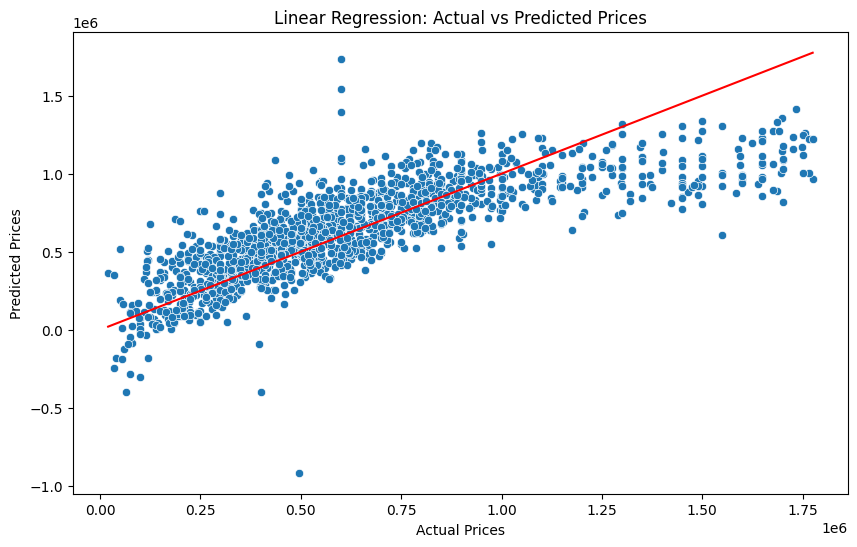

Best Ridge Alpha: {'alpha': 1}
Best Lasso Alpha: {'alpha': 100}


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('car_dekho_cleaned_dataset.csv')

# Define features and target
X = df[['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats']]
y = df['price']

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Cross-Validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression CV Mean MSE: {-cv_scores.mean()}')

# Model Prediction
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning for Ridge and Lasso using Grid Search
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print(f'Best Ridge Alpha: {ridge_grid.best_params_}')

lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print(f'Best Lasso Alpha: {lasso_grid.best_params_}')


Random Forest with Cross-Validation and Hyperparameter Tuning (Random Search)

Random Forest CV Mean MSE: 15650193812.395634
Random Forest - MSE: 16376749642.474905, MAE: 78404.97979754777, R²: 0.8726349616402262


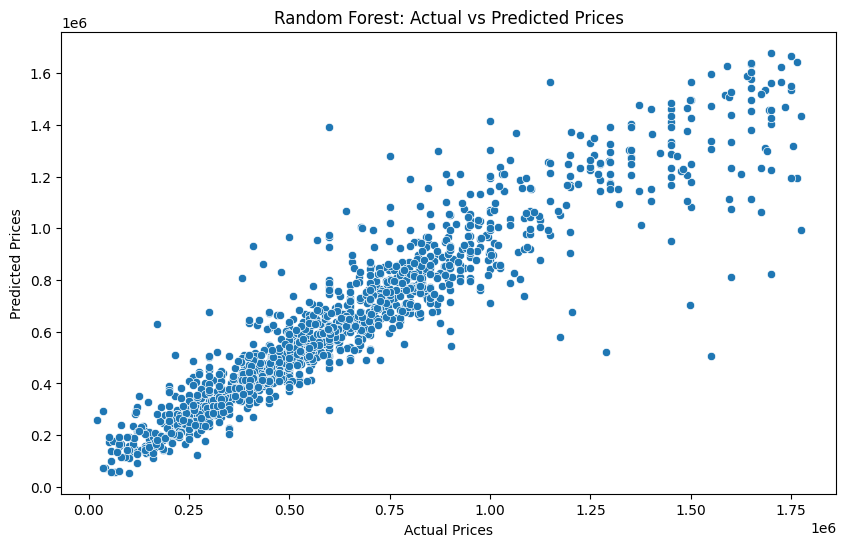

Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training with Bagging
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(rf_model, rf_params, n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)

print(f'Best Random Forest Params: {rf_random.best_params_}')


Summary and Comparison Table

In [13]:
import pandas as pd

# Store model evaluation metrics
model_results = {
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'MAE': [mae_lr,  mae_rf],
    'R²': [r2_lr,  r2_rf]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(model_results)

# Display the Model Comparison Table
print("Model Comparison Table:")
print(comparison_df)

# Identify the best model based on the highest R² and the lowest MSE/MAE
best_model_idx = comparison_df['R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_mse = comparison_df.loc[best_model_idx, 'MSE']
best_model_mae = comparison_df.loc[best_model_idx, 'MAE']
best_model_r2 = comparison_df.loc[best_model_idx, 'R²']

# Print the summary of the best model
print("\nBest Model Summary:")
print(f"Best Model: {best_model_name}")
print(f"MSE: {best_model_mse}")
print(f"MAE: {best_model_mae}")
print(f"R²: {best_model_r2}")



Model Comparison Table:
               Model           MSE            MAE        R²
0  Linear Regression  4.835147e+10  158699.202873  0.623962
1      Random Forest  1.637675e+10   78404.979798  0.872635

Best Model Summary:
Best Model: Random Forest
MSE: 16376749642.474905
MAE: 78404.97979754777
R²: 0.8726349616402262


Finalized Model Training :

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import time

In [2]:
# Load dataset
data = pd.read_csv('car_dekho_cleaned_dataset.csv')

# Load preprocessing steps
label_encoders = joblib.load('label_encoders.pkl')
scalers = joblib.load('scalers.pkl')

C:\Users\Palla. Saidulu\AppData\Local\Temp\ipykernel_13600\2749665152.py:2: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('car_dekho_cleaned_dataset.csv')


In [3]:
# Feature Engineering
data['car_age'] = 2024 - data['modelYear']
brand_popularity = data.groupby('oem')['price'].mean().to_dict()
data['brand_popularity'] = data['oem'].map(brand_popularity)
data['mileage_normalized'] = data['mileage'] / data['car_age']

# Define features and target
features = ['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats', 'car_age', 'brand_popularity', 'mileage_normalized']
X = data[features]
y = data['price']

In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model with RandomizedSearchCV for hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)

In [5]:
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

start_time = time.time()
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)
end_time = time.time()

In [6]:
# Best model
best_rf_model = rf_random.best_estimator_

# Cross-Validation
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')


Random Forest CV Mean MSE: 13791221801.648886


In [7]:
# Model Prediction
start_predict_time = time.time()
y_pred_rf = best_rf_model.predict(X_test)
end_predict_time = time.time()

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')
print(f'Training Time: {end_time - start_time} seconds')
print(f'Prediction Time: {end_predict_time - start_predict_time} seconds')

Random Forest - MSE: 13497241687.893726, MAE: 74443.74795879469, R²: 0.8950294324051271
Training Time: 70.3702802658081 seconds
Prediction Time: 0.04865884780883789 seconds


In [8]:
# Evaluate on older cars
older_cars = data[data['car_age'] > 10]  # Assuming older cars are those older than 10 years
X_older = older_cars[features]
y_older = older_cars['price']

y_pred_older = best_rf_model.predict(X_older)
mse_older = mean_squared_error(y_older, y_pred_older)
mae_older = mean_absolute_error(y_older, y_pred_older)
r2_older = r2_score(y_older, y_pred_older)

print(f'Older Cars - MSE: {mse_older}, MAE: {mae_older}, R²: {r2_older}')

Older Cars - MSE: 4178028958.393938, MAE: 36947.449834733, R²: 0.9675905747765923


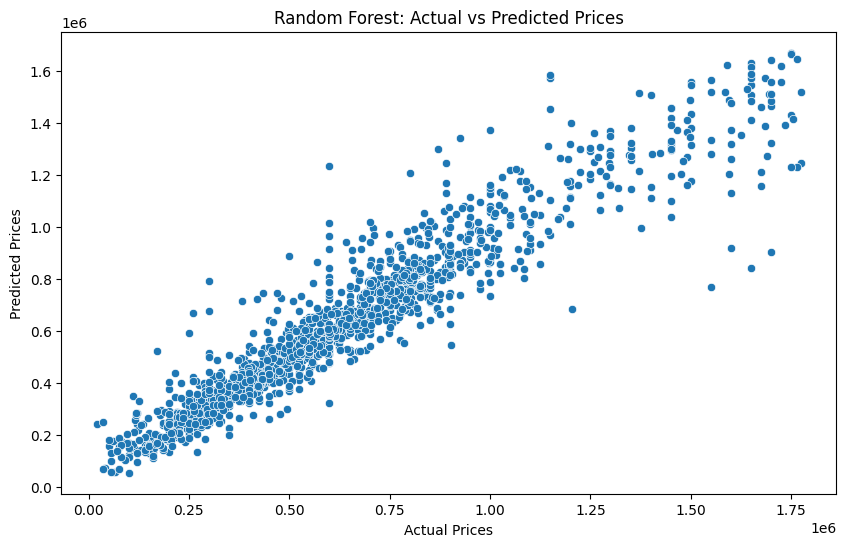

In [9]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

In [10]:
# Save the trained model
joblib.dump(best_rf_model, 'car_price_prediction_model.pkl')

print("Model training complete. Model saved as 'car_price_prediction_model.pkl'.")

Model training complete. Model saved as 'car_price_prediction_model.pkl'.


In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import time

# Load dataset
data = pd.read_csv('car_dekho_cleaned_dataset.csv')

# Load preprocessing steps
label_encoders = joblib.load('label_encoders.pkl')
scalers = joblib.load('scalers.pkl')

# Feature Engineering
data['car_age'] = 2024 - data['modelYear']
brand_popularity = data.groupby('oem')['price'].mean().to_dict()
data['brand_popularity'] = data['oem'].map(brand_popularity)
data['mileage_normalized'] = data['mileage'] / data['car_age']

# Define features and target
features = ['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats', 'car_age', 'brand_popularity', 'mileage_normalized']
X = data[features]
y = data['price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model with RandomizedSearchCV for hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

start_time = time.time()
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)
end_time = time.time()

# Best model
best_rf_model = rf_random.best_estimator_

# Cross-Validation
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
start_predict_time = time.time()
y_pred_rf = best_rf_model.predict(X_test)
end_predict_time = time.time()

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')
print(f'Training Time: {end_time - start_time} seconds')
print(f'Prediction Time: {end_predict_time - start_predict_time} seconds')

# Evaluate on older cars
older_cars = data[data['car_age'] > 10]  # Assuming older cars are those older than 10 years
X_older = older_cars[features]
y_older = older_cars['price']

y_pred_older = best_rf_model.predict(X_older)
mse_older = mean_squared_error(y_older, y_pred_older)
mae_older = mean_absolute_error(y_older, y_pred_older)
r2_older = r2_score(y_older, y_pred_older)

print(f'Older Cars - MSE: {mse_older}, MAE: {mae_older}, R²: {r2_older}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Save the trained model
joblib.dump(best_rf_model, 'car_price_prediction_model.pkl')

print("Model training complete. Model saved as 'car_price_prediction_model.pkl'.")


C:\Users\Palla. Saidulu\AppData\Local\Temp\ipykernel_5708\225739384.py:12: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('car_dekho_cleaned_dataset.csv')


KeyboardInterrupt: 